<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="210" style="border-radius: 50%;"/>
</p>

# Markov Chain Monte Carlo (MCMC) Approximation

#### Tien N Phan, Ph.D. Student
#### Hildebrand Department of Petroleum and Geosystem Engineering, The University of Texas at Austin

### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering

_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Elnara Rustamzade, Graduate Student, The University of Texas at Austin
##### [LinkedIn](https://www.linkedin.com/in/elnara-rustamzade/)


### Executive Summary


* In Bayesian, getting an accurate estimation of the posterior distribution could be time and effort expensive. One way to achive is to sample from a large number of representation points.

* The gap here to discuss that MCMC methods can be used to generate samples from complex distributions by constructing a Markov chain that converges to the target distribution $p(x)$. The Metropolis algorithm is a simple MCMC method that uses a symmetric proposal distribution (e.g., Gaussian) and an acceptance rule.

* Random walks are used to explore probability distributions in foundational understanding MCMC.

* More complex distributions require a longer duration to achieve a good approximation to the response.

* High acceptance rate but slower exploration of parameter space which can cause the chain to converge slowly.



### In this project, my workflow follows the key steps:

1. Start with the basic Random Walk process.

2. Introduce MCMC with the Metropolis algorithm.

3. Compare MCMC Metropolis with Monte Carlo and Analytical Solutions.

4. Discuss on MCMC Accuracy and Draw Conclusion.

### Project Goal:

My goal in this project is to explore and demonstrate the use of Monte Carlo and Markov Chain Monte Carlo (MCMC) methods by starting with basic Monte Carlo technique, progressing to understand the Random Walk, and introduce MCMC method, specifically Metropolis algorithm.

### `Code and Reference Cited`:

I follow  the `R` codes and visualization from [**Doing Bayesian Data Analysis**](https://sites.google.com/site/doingbayesiandataanalysis/) by **John K. Krushchke** to build in this project the `python` codes for the demonstration and explaination.

### Import required libraries:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, beta, gamma, uniform

## 1. Random Walk - a Simple Case of the Metropolis Algorithm

### Motivation

In Bayesian inference, we often need to sample from complex posterior distributions that cannot be sampled directly.

A random walk proposal is simple explanation of Metropolis algorithm, where the next sample is proposed by adding a random perturbation to the current state.

### The island hopping problem:

* There are different populated islands.

* An elected politician needs to visit all islands to say *hello* to resident on the island that he will visit, so that he will spend the most time on the most populated islands, and less time on the less populated islands.

* The politian has to decide whether to visit the next island without knowing the population of each island is.


### Steps

1. Define the parameter $\theta$ as the island index

2. Assume the relative population of island $P(\theta)=\theta$

3. Start the first moving step (t=1) on the island in the middle

4. Determine the probabilities of positions for the second moving step (t=2) by flipping a fair coin to decide which direction to move

5. Accept or reject the move by comparing a uniform distribution $u \approx U(0,1)$ with $p_{\mathrm{move}}$

    $p_{\mathrm{move}}=\mathrm{min}\left(\frac{P(\theta_{\mathrm{proposed}})}{P(\theta_{\mathrm{curcuren}})},1\right)$

    If $u < p_{\mathrm{move}}$, then make the move to the adjacent island. Otherwise, reject the move and stay at the current island.

6. Repeat for the next step



### Codes Implementation


In this project, let's consider that there are 7 islands and relative populations of the islands increase linearly such that $P(\theta)=\theta$

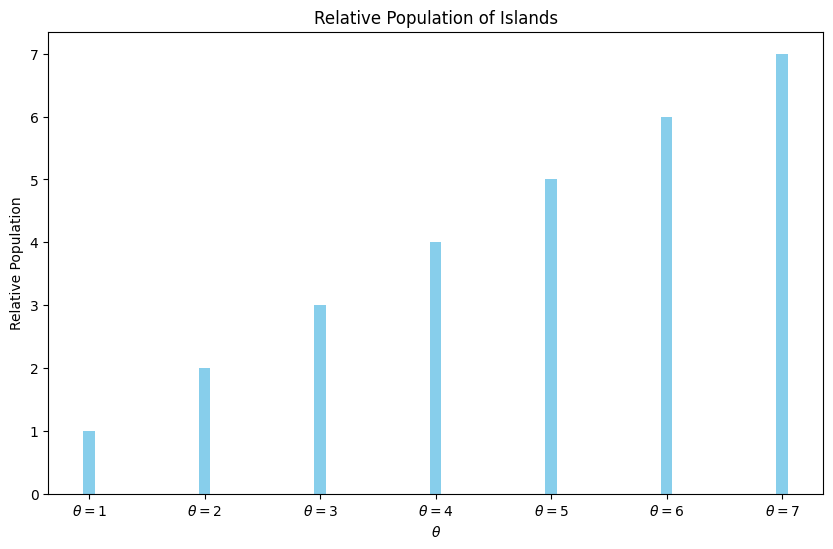

In [3]:
# Define islands: theta from 1 to 7 with P(theta) = theta (relative population)
theta_values = np.arange(1, 8)
P_theta = theta_values  # Relative population

# Plotting the relative population
plt.figure(figsize=(10, 6))
bar_width = 0.1
plt.bar(theta_values, P_theta, width=bar_width, color='skyblue')
plt.title("Relative Population of Islands")
plt.xticks(theta_values, [f"$\\theta={i}$" for i in theta_values])
plt.xlabel(r"$\theta$")
plt.ylabel("Relative Population")
plt.xticks(theta_values)
plt.show()


The island to the left of 1 and to the right of 7 have populations of zero. Therefore, if the politician move to these islands, the proposal will be rejected.

Let's define the random walk function:

#### Function to perform random walk:

In [4]:
# Perform the random walk
def random_walk(n_steps: int) -> np.ndarray:
    np.random.seed(73071)  # For reproducibility
    chain = np.zeros(n_steps, dtype=int)
    chain[0] = 4  # Start at island 4 (theta = 4)
    for t in range(1, n_steps):
        current = chain[t - 1]

        # Propose move: left (-1) or right (+1)
        move = np.random.choice([-1, 1])
        proposed = current + move

        # Stay in bounds [1, 7]
        if proposed < 1 or proposed > 7:
            chain[t] = current  # Reject move out of bounds
            continue

        # Acceptance probability
        p_move = min(1, P_theta[proposed - 1] / P_theta[current - 1])
        if np.random.rand() < p_move:
            chain[t] = proposed
        else:
            chain[t] = current  # Reject move
    return chain

* In the first moving step of random walk, a random choice of [-1, 1] represents that the politician decide whether to travel to the proposed island by flipping a fair coin to decide whether to propose the adjacent island to the east or to the west.

    ```python
    move = np.random.choice([-1,1])                                     
    ```

* If the proposed island has a larger population than the current island, then he decides goes to the proposed island.

* Otherwise, if the proposed island has a smaller population than the current island, then he goes to the proposed island only by another randomly checking with acceptance probability.


#### Let's visualize and compare the trajectory of steps with the frequency of distribution in the walk:

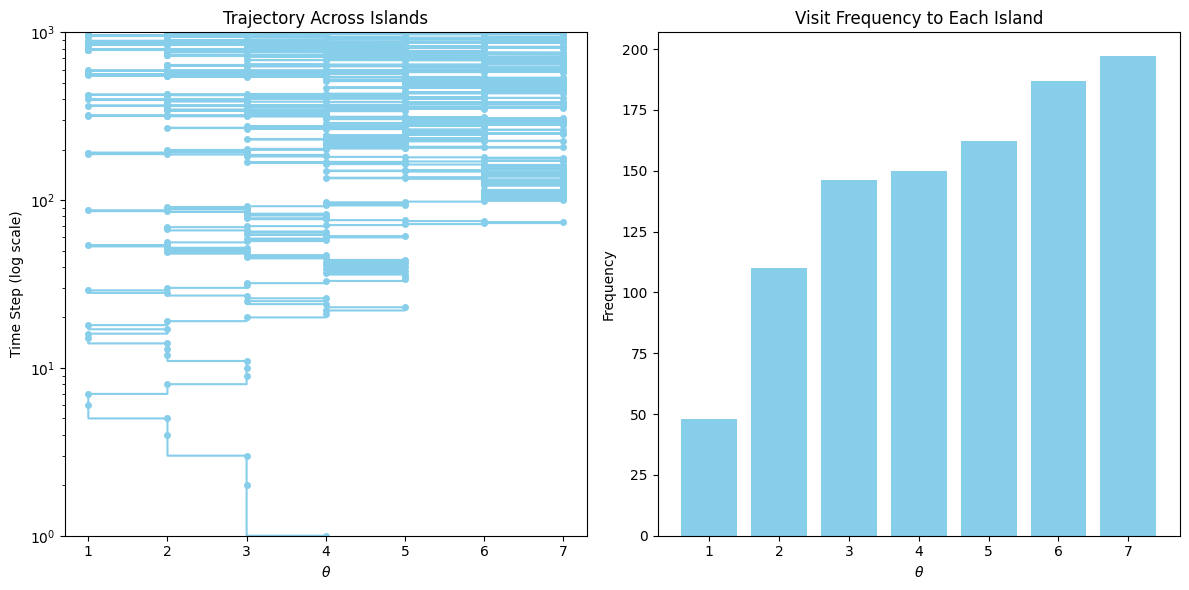

In [5]:
steps = 1000
chain = random_walk(steps)

# Compute visit frequencies
unique, counts = np.unique(chain, return_counts=True)
visit_freq = np.zeros(7)
visit_freq[unique - 1] = counts

# Plot results
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Trajectory: theta on x-axis, step on y-axis with log scale starting at 1
steps = np.arange(1, steps + 1)
axes[0].plot(chain, steps, drawstyle='steps-post', color='skyblue', marker='o', markersize=4)
axes[0].set_yscale('log')
axes[0].set_ylim(1, steps[-1])
axes[0].set_title("Trajectory Across Islands")
axes[0].set_ylabel("Time Step (log scale)")
axes[0].set_xlabel(r"$\theta$")
axes[0].set_xticks(theta_values)

# Frequency histogram (top)
axes[1].bar(theta_values, visit_freq, color='skyblue')
axes[1].set_title("Visit Frequency to Each Island")
axes[1].set_xlabel(r"$\theta$")
axes[1].set_ylabel("Frequency")
axes[1].set_xticks(theta_values)

plt.tight_layout()
plt.show()

* The plot of *trajectory across islands* shows the possible trajectory that politician accept to move across 7 islands for 500 steps.

* In the first step (t=1), it is assumed $\theta$=4. To decide the move on the second step, he flips a coin to propose either moving to one position left or one position right. In this scenario, the coin proposes moving left, at $\theta$=3. It mean  $p_{move}=\frac{P(\theta_{proposed}}{\theta_{current}}$ = 3/4; is larger than the random $np.random.rand()$ he would genrate in this step to accept the move.

* By counting the number times that politician visits the island, approximation of the target probability at each value of $\theta$ can be approximated.

* The trend of later steps in the long run reflects the target distribution that the politician needs to visit. The *trajectory accross islands* in the left-hand side is consistent with the *Visit Frequency to Each Island* to the right-hand side.

#### Lesson Learnt:

* It is considered that with the target distribution $P(\theta)$ is a posterior which can be expressed as: $P(\theta) \approx p(D|\theta)p(\theta) $, by evaluating $p(D|\theta)p(\theta) $, we can generate random representative values from the posterior distribution.

* Using this techniques, we can do Bayesian inference in the complex models. In the following workflow, we apply Metropolis with likelihood $p(D|\theta)$ using Bernoulli, and Prior $p(\theta) $ using Beta function.

## 2. Metropolis Algorithm - Posterior Approximation

### Scenario Statement:

* Flip a coin ```N``` times and observe ```z``` heads.

* Bernoulli likelihood function prior Beta functions are applied.

  $p(z,N|\theta)=\theta^{z}\left(1-\theta\right)^{(N-z)}$

  $p(\theta) = beta(\theta|a,b)$

* A normal distribution of mean 0 and standard deviation (SD) is used for the deciding the proposed jump, $\Delta\theta \approx N(0,\sigma)$



### Steps

1. Start with an arbitrary initial value of $\theta$, denoted as $\theta_{cur}$

2. Randomly genrate a proposed jump, $\Delta\theta \approx N(0,\sigma)$. The proposed value of the parameter is denoted as $\theta_{pro}=\theta_{cur} + \Delta\theta$



3. Compute the probability of moving step:

    $p_{\mathrm{move}}=\mathrm{min}\left(\frac{P(\theta_{\mathrm{pro}})}{P(\theta_{\mathrm{cur}})},1\right)$

    where $P(\theta) = p(D|\theta)p(\theta)$; replace $\theta$ by $\theta_{cur}$ and $\theta_{pro}$ accordingly

    If the proposed value $\theta_{pro}$ occurs outside the allowed bounds of $\theta$, the prior and/ or likelihood is set to zero, hence $p_{move}$ is zero

4. Accept the proposed parameter value if a random value sampled from [0,1] uniform distribution is less than $p_{move}$. Otherwise, reject the proposed parameter value and repeat the current value again.


5. Repeat for the next step



### Codes Implementation

Based on the statement, let's define the prior, likelihood, and posterior function:

In [6]:
# Likelihood function
def likelihood(theta, data):
    z = np.sum(data)
    N = len(data)
    result = theta**z * (1 - theta)**(N - z) # Bernoulli likelihood
    result[(theta < 0) | (theta > 1)] = 0 # creates a mask for theta outside [0, 1]
    return result

# Prior function (uniform Beta)
def prior(theta):
    p = beta.pdf(theta, 1, 1)  # Uniform prior on [0, 1]
    p[(theta < 0) | (theta > 1)] = 0
    return p

# Unnormalized posterior
def target_rel_prob(theta, data):
    return likelihood(theta, data) * prior(theta) # Bayesian inference for a Bernoulli likelihood with a uniform Beta prior

# Function to compute the 95% HDI from a sample
def compute_hdi(sample, cred_mass=0.95):
    sorted_sample = np.sort(sample)
    ci_index = int(np.floor(cred_mass * len(sorted_sample)))
    n_ci = len(sorted_sample) - ci_index
    hdi_min = sorted_sample[:n_ci]
    hdi_max = sorted_sample[ci_index:]
    hdi_width = hdi_max - hdi_min
    min_idx = np.argmin(hdi_width)
    return hdi_min[min_idx], hdi_max[min_idx]

# Metropolis sampling parameters

def metropolis_hastings(data, trace_length, proposal_sd):
    np.random.seed(73071)  # For reproducibility
    # Initialize trajectory
    trajectory = np.zeros(trace_length)
    trajectory[0] = 0.01
    burn_in = int(0.0 * trace_length)
    n_accepted = 0
    n_rejected = 0

    # Metropolis algorithm
    for t in range(trace_length - 1):
        current = trajectory[t]
        proposed = current + np.random.normal(0, proposal_sd)
        p_accept = min(1, target_rel_prob(np.array([proposed]), data)[0] /
                        target_rel_prob(np.array([current]), data)[0])
        if np.random.rand() < p_accept:
            trajectory[t+1] = proposed
            if t > burn_in:
                n_accepted += 1
        else:
            trajectory[t+1] = current
            if t > burn_in:
                n_rejected += 1

    accepted_traj = trajectory[burn_in:]
    return trajectory, accepted_traj, n_accepted, n_rejected

In addition to defining the prior, likelihood and posterior, the function `compute_hdi` is used to compute the **95% Highest Density Interval (HDI)** which is a Bayesian cdedible interval representing the range of parameter values within 95% of the posterior probability. It is compared to **Confidence Intervals**, but the confidence intervals are used for typical sampling distribution, while HDI is used for posterior distribution.

Metropolis MCMC function `metropolis_hastings` is defined for different standard deviation $\sigma$ of the proposed jump.

* `data`: dataset to be used, the same in the likelihood

* `trace_length`: is the total number of steps in the Markov chain. This number determine the number of iterations.

* `proposal_sd`: is the standard deviation vector which contains a list of standard deviation values in the normal distribution of the jump. This number decide how far the algorithm "jumps" in each step.

It is assumed that the first value is set to be `0.01` in the Markov chain.

There is no burn-in in this case.

For each step in the Markov chain, the *proposed state* is generated by adding a random value from a normal distribution $N(1,\sigma)$ to the *current state*.

The *acceptant probability* `p_accept` is calculated as the ratio of posterior probabilties of the proposed and current states.

A random number from a uniform distribution `[0,1]` is used for the decision of accept or reject the state. If this number is less than `p_accept`, then the proposed value is accepted and added to the trace. Otherwise, it remains at the current value.

##### The following code block used to plot the posterior and Markov chain for different values of standard deviation in the normal distribution of the jump.

In [7]:
# Plot posterior histogram
def plot_posterior(data, traj_length, proposal_sd):

    n_sd = len(proposal_sd)

    fig, axes = plt.subplots(3, n_sd, figsize=(15, 12))

    for i in range(n_sd):

        trajectory, accepted_traj, n_accepted, n_rejected = metropolis_hastings(data, traj_length, proposal_sd[i])

        axes[0][i].hist(accepted_traj, bins=50, density=True, color='skyblue', edgecolor='white')
        axes[0][i].set_xlim(0, 1)
        axes[0][i].set_xlabel(r"$\theta$")
        axes[0][i].set_ylabel('Density', fontsize=12)
        axes[0][i].set_title(f"Posterior (Proposal $\sigma$ = {proposal_sd[i]})")

        # Compute HDI
        hdi_low, hdi_high = compute_hdi(accepted_traj, 0.95)
        accept_rate = n_accepted / len(accepted_traj)

        # Add filled black HDI line with text
        ymin, ymax = axes[0][i].get_ylim()
        axes[0][i].hlines(y=ymax*0.02, xmin=hdi_low, xmax=hdi_high, color='black', linewidth=4)
        axes[0][i].text(hdi_low, ymax*0.04, f"{hdi_low:.3f}", ha='center', fontsize=9, fontweight='bold')
        axes[0][i].text((hdi_low + hdi_high)/2, ymax*0.06, "95% HDI", ha='center', fontsize=10, fontweight='bold')
        axes[0][i].text(hdi_high, ymax*0.04, f"{hdi_high:.3f}", ha='center', fontsize=9, fontweight='bold')
        axes[0][i].text(0.01, ymax*0.84, f"Accept Rate = {accept_rate:.3f}", fontsize=9, ha='left')

        # Trace plot - end of chain
        idx_end = np.arange(traj_length - 100, traj_length)
        axes[1][i].plot(trajectory[idx_end], idx_end, marker='o', linestyle='-', color='skyblue')
        axes[1][i].set_xlim(0, 1)
        axes[1][i].set_xlabel(r"$\theta$")
        axes[1][i].set_ylabel("Step")
        axes[1][i].set_title("End of Chain")

        # Trace plot - beginning of chain
        idx_start = np.arange(0, 100)
        axes[2][i].plot(trajectory[idx_start], idx_start, marker='o', linestyle='-', color='skyblue')
        axes[2][i].set_xlim(0, 1)
        axes[2][i].set_xlabel(r"$\theta$")
        axes[2][i].set_ylabel("Step")
        axes[2][i].set_title("Beginning of Chain")

        plt.tight_layout()
    plt.show()


Now, let's define dataset, call ```plot_posterior``` function to  visualize the posterior distributions and Markov chains for different values of standard deviation $\sigma$.

The prior is defined as a uniform beta distribution $beta(\theta, 1, 1)$ with flipping a coin 20 times ($N = 20$), the head shows 14 times ($z = 14$).

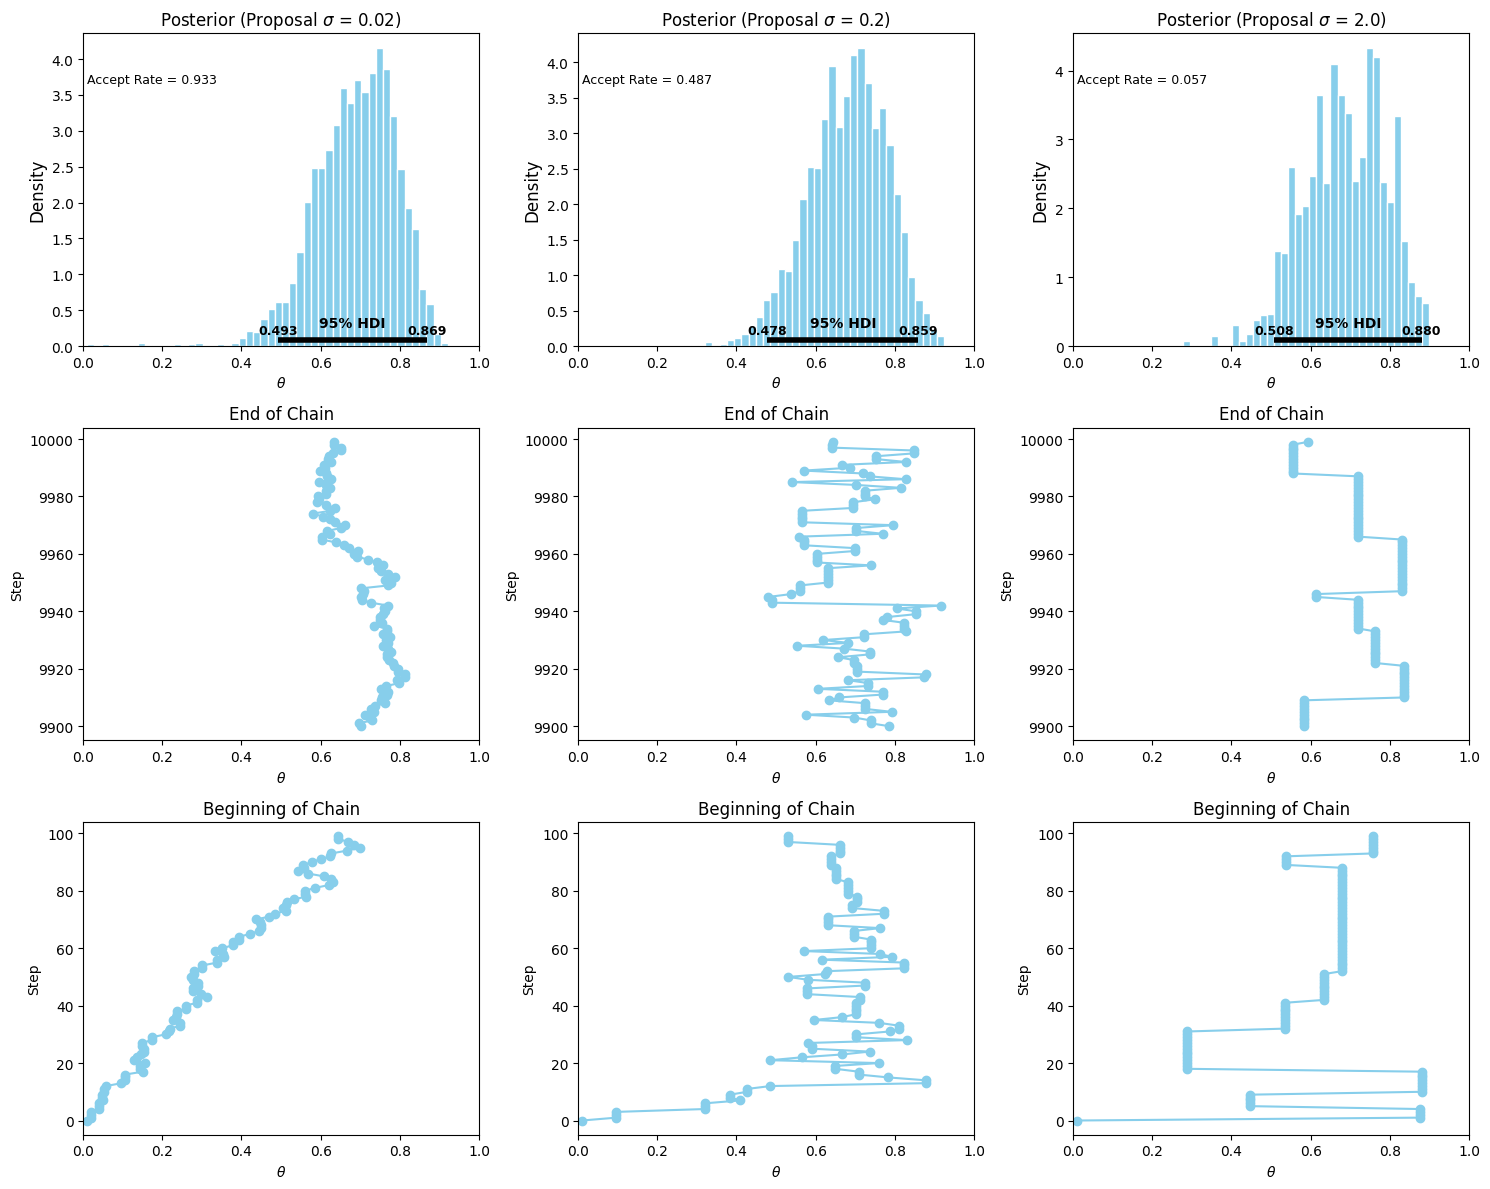

In [8]:

# Data: 6 zeros, 14 ones
data = np.array([0]*6 + [1]*14)
plot_posterior(data, traj_length=10000, proposal_sd=[0.02, 0.2, 2.0])


Three columns in the figure above showing three different runs of Metropolis using three different values of $\sigma$ in the proposal distribution. The initial $\theta$ is started at ```0.01``` in all cases.

The middle column indicates the moderate value of standard deviation $\sigma$ = ```0.2```, which means that the proposed jump from one state of $\theta$ to the next state is within +- 0.2 of $\theta_{curr}$ for 68% of the time (because in normal distribution 68% of probability is between $-\sigma$ and +$\sigma$). The accepted rate is defined by the number of accepted proposal divided by the total number of proposals in the chain; $N_{proposed}/N_{total}$. In this case, the accepted rate is about 0.5 or 50%.

The lower chains at the bottom figures (*Beginning of Chain*) for the middle and right plots showing that they move away quickly from the unrepresentative starting point of *$\theta$=0.01*. However, with smaller $\sigma$ like $\sigma=$ ```0.02``` as displayed in the first column, smaller moves with many steps in the chain are needed to move away from the unrepresentative starting point. The chain shows gradually move, producing a snake-like chain and it takes longer run to explore the posterior distribution.

In the right-most column with $\sigma$=```2```, even the chain jump quickly away from the unrepresentative point (starting at 0.01), but every single state the proposed jump is often far away from the area of the posterior distribution. Therefore, the proposals are often rejected and the chain just stays at one value for many steps. The process accepts a new values occasionally and very unstable. In this case, the histogram is not smooth.

The histogram looks smooth in the left-column and middle-column, and they indicate an accurate approximation of the underlying posterior distribution.

#### Lesson Learnt:

A moderate proposal distribution will achieve a good approximation in fewer steps than either of the extreme proposal distributions.

### 3. Comparision of Analytical Posterior, Monte Carlo Sampling and Metropolis Hasting Sampling

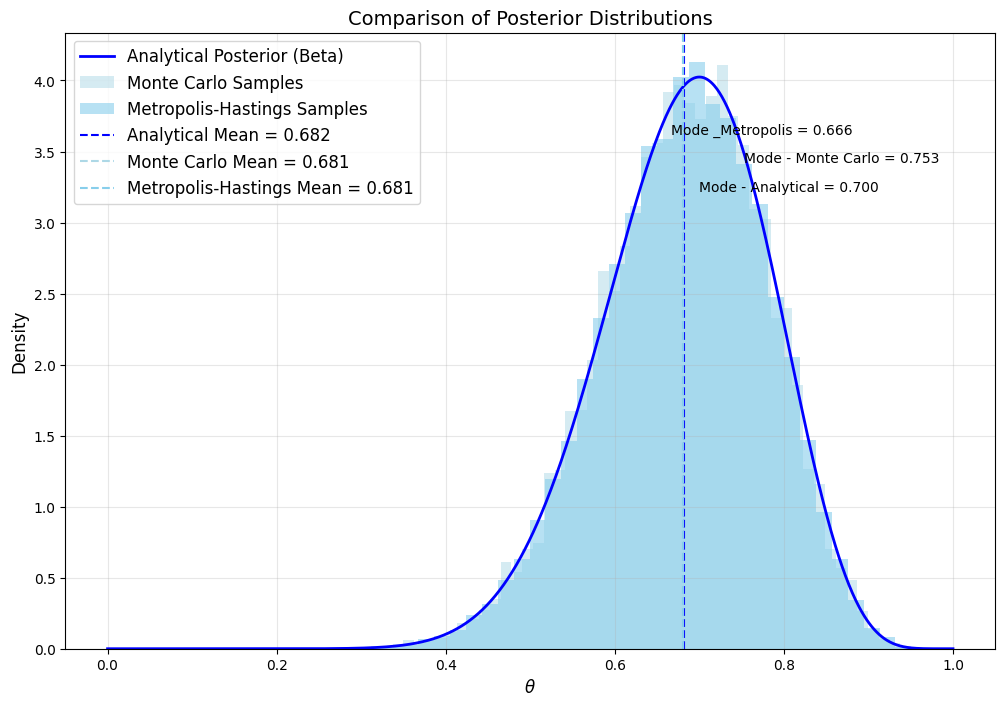

Monte Carlo:
  Mean = 0.681, Mode = 0.753, 95% HDI = [0.482, 0.858]
Metropolis-Hastings:
  Mean = 0.681, Mode = 0.666, 95% HDI = [0.493, 0.864]
Analytical Posterior:
  Mean = 0.682, Mode = 0.700, 95% HDI = [0.478, 0.854]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

z = np.sum(data)  # Number of successes
N = len(data)  # Total trials
prior_alpha = 1  # Uniform prior (Beta(1, 1))
prior_beta = 1

# Analytical posterior parameters
posterior_alpha = prior_alpha + z
posterior_beta = prior_beta + N - z

# Monte Carlo sampling from the Beta posterior
mc_samples = np.random.beta(posterior_alpha, posterior_beta, size=10000)

# Metropolis-Hastings sampling
traj_length = 50000
proposal_sd = 0.2
trajectory, accepted_traj, n_accepted, n_rejected = metropolis_hastings(data, traj_length, proposal_sd)

# Plot comparison
theta = np.linspace(0, 1, 1000)
analytical_posterior = beta.pdf(theta, posterior_alpha, posterior_beta)

plt.figure(figsize=(12, 8))

# Analytical posterior
plt.plot(theta, analytical_posterior, label="Analytical Posterior (Beta)", color='blue', linewidth=2)

# Monte Carlo histogram
plt.hist(mc_samples, bins=50, density=True, alpha=0.5, color='lightblue', label="Monte Carlo Samples")

# Metropolis-Hastings histogram
plt.hist(accepted_traj, bins=50, density=True, alpha=0.6, color='skyblue', label="Metropolis-Hastings Samples")

# Compute mean and mode for each method
analytical_mean = posterior_alpha / (posterior_alpha + posterior_beta)
analytical_mode = (posterior_alpha - 1) / (posterior_alpha + posterior_beta - 2)
mc_mean = np.mean(mc_samples)
mc_mode = mc_samples[np.argmax(np.histogram(mc_samples, bins=50, density=True)[0])]
mh_mean = np.mean(accepted_traj)
mh_mode = accepted_traj[np.argmax(np.histogram(accepted_traj, bins=50, density=True)[0])]

# Annotate mean and mode on the plot
plt.axvline(analytical_mean, color='blue', linestyle='--', label=f"Analytical Mean = {analytical_mean:.3f}")
plt.axvline(mc_mean, color='lightblue', linestyle='--', label=f"Monte Carlo Mean = {mc_mean:.3f}")
plt.axvline(mh_mean, color='skyblue', linestyle='--', label=f"Metropolis-Hastings Mean = {mh_mean:.3f}")
plt.text(analytical_mode, 0.8 * max(analytical_posterior), f"Mode - Analytical = {analytical_mode:.3f}", color='black', fontsize=10)
plt.text(mc_mode, 0.85 * max(analytical_posterior), f"Mode - Monte Carlo = {mc_mode:.3f}", color='black', fontsize=10)
plt.text(mh_mode, 0.9 * max(analytical_posterior), f"Mode _Metropolis = {mh_mode:.3f}", color='black', fontsize=10)

# Add labels and legend
plt.title("Comparison of Posterior Distributions", fontsize=14)
plt.xlabel(r"$\theta$", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Compute and print key metrics
def compute_metrics(samples, method_name):
    mean = np.mean(samples)
    mode = samples[np.argmax(np.histogram(samples, bins=50, density=True)[0])]
    hdi_low, hdi_high = compute_hdi(samples, 0.95)
    print(f"{method_name}:\n  Mean = {mean:.3f}, Mode = {mode:.3f}, 95% HDI = [{hdi_low:.3f}, {hdi_high:.3f}]")

compute_metrics(mc_samples, "Monte Carlo")
compute_metrics(accepted_traj, "Metropolis-Hastings")
print(f"Analytical Posterior:\n  Mean = {posterior_alpha / (posterior_alpha + posterior_beta):.3f}, "
      f"Mode = {(posterior_alpha - 1) / (posterior_alpha + posterior_beta - 2):.3f}, "
      f"95% HDI = [{beta.ppf(0.025, posterior_alpha, posterior_beta):.3f}, {beta.ppf(0.975, posterior_alpha, posterior_beta):.3f}]")

* The histograms of the Metropolis samples matches closely with Monte Carlo and analytical posterior curve.

* Statistic Summary of Mean, mode, and 95% HDI for all three methods are very similar which demonstrate the accuracy of the MCMC Metropolis in approximating the posterior distribution.

### 4. Conclusion:

In this project, I explore the effectiveness of Random Walk and Metropolis-Hastings algorithm in approximating posterior distributions in Bayesian inference. The results show that the posterior samples generated by the Metropolis-Hastings algorithm closely match the analytical posterior distribution and the Monte Carlo samples.

Lessons Learned:

* The Metropolis-Hastings algorithm is a robust method for sampling from complex posterior distributions, especially when analytical solutions are unavailable.

* Proposal Distribution Tuning: The standard deviation of the proposal distribution significantly impacts the efficiency of the Metropolis-Hastings algorithm. Proper tuning ensures faster convergence and better exploration of the parameter space.
Comparison of Methods:

* Comparing Metropolis-Hastings with Monte Carlo and analytical solutions provides the similar performance metrics and its ability to approximate the true posterior.

## END

___________________

I am a PhD student in Petroleum Engineering, at the University of Texas at Austin. I work in areas of CO2 Foam EOR, Carbon Utilization and Storage, Reservoir Characterization, Modeling and Machine Learning.

My LinkedIn:  [LinkedIn](https://www.linkedin.com/in/tiennphan/)


I am excited to build meaningful collaborations, learn and work on projects or internships in similar areas.


Thank you,

*Tien Phan*

___________________

#### About the Supervising Professor

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences.

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you!

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)